<a href="https://colab.research.google.com/github/MrCogito/Spectrogram-Generator/blob/main/Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generate spectrogram**

In [1]:
!pip install tensorflow-io

     |████████████████████████████████| 22.7 MB 1.3 MB/s 
     |████████████████████████████████| 2.1 MB 57.3 MB/s 


In [9]:

import tensorflow as tf
import tensorflow_io as tfio
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
import pathlib
import os
import librosa
import IPython.display as ipd
import soundfile

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
!unzip /content/gdrive/MyDrive/Inzynierka/Data/en.zip > /dev/null

In [6]:
audio_folder = '/content/en/clips/'
spectrogram_folder = '/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram/'
audio_tensor_folder = '/content/gdrive/MyDrive/Inzynierka/Data/en_audio_tensors/'
audio_trim_folder = '/content/gdrive/MyDrive/Inzynierka/Data/audio_trim_folder/'

In [11]:
#trim silence in all audio samples
for filename in os.listdir(audio_folder)[:10]:
  if filename.endswith("mp3"):
    audio_file, sr = librosa.load(audio_folder + filename)
    audio_file_trim, index = librosa.effects.trim(audio_file, top_db = 20) 
    audio_file_trim_8k = librosa.resample(audio_file_trim, sr, target_sr = 8000) 
    soundfile.write(audio_trim_folder + filename + '.wav', audio_file_trim_8k, samplerate = 8000)



/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
def mp3_to_tensors(filename):
  audio = tfio.audio.AudioIOTensor(audio_folder + filename)
  audio_slice = audio[:48000]
  audio_tensor = tf.squeeze(audio_slice, axis=[-1])
  tensor = tf.cast(audio_tensor, tf.float32) / 32768.0  # change tensor to float
  spectrogram = tfio.audio.spectrogram(tensor, nfft=512, window=512, stride=512) 
  return spectrogram, audio_tensor

In [ ]:
import time 

In [ ]:
start = time.time()
for filename in os.listdir(audio_folder)[:10]:
    if filename.endswith("mp3"): 
        spectrogram, audio_tensor = mp3_to_tensors(filename) 
        np.save(spectrogram_folder + filename , spectrogram)
        np.save(audio_tensor_folder + filename, audio_tensor)
        print("done" + filename)
        
end = time.time()
print(end - start)   

donecommon_voice_en_22571898.mp3
donecommon_voice_en_22097240.mp3
donecommon_voice_en_22207318.mp3
donecommon_voice_en_21999565.mp3
donecommon_voice_en_22134063.mp3
donecommon_voice_en_22401762.mp3
donecommon_voice_en_22088559.mp3
donecommon_voice_en_21944474.mp3
donecommon_voice_en_21953607.mp3
donecommon_voice_en_21901144.mp3
5.077531814575195


In [ ]:
tensor_print = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_audio_tensors/common_voice_en_21961688.mp3.npy' , allow_pickle=True)
tensor_print2 = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_audio_tensors/common_voice_en_22088825.mp3.npy' , allow_pickle=True)
tensor_print3 = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_audio_tensors/common_voice_en_22155883.mp3.npy' , allow_pickle=True)
tensor_print4 = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_audio_tensors/common_voice_en_22356584.mp3.npy' , allow_pickle=True)
tensor_print5 = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_audio_tensors/common_voice_en_22439401.mp3.npy' , allow_pickle=True)

spectrogram_print = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram/common_voice_en_21961688.mp3.npy' , allow_pickle=True)
spectrogram_print1 = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram/common_voice_en_22088825.mp3.npy' , allow_pickle=True)
spectrogram_print2 = np.load('/content/gdrive/MyDrive/Inzynierka/Data/en_spectrogram/common_voice_en_22155883.mp3.npy' , allow_pickle=True)
print("Audio Tensor:")
print(tf.size(tensor_print))
print("Audio Tensor2:")
print(tf.size(tensor_print2))
print("Audio Tensor3:")
print(tf.size(tensor_print3))
print("Audio Tensor4:")
print(tf.size(tensor_print4))
print("Audio Tensor5:")
print(tf.size(tensor_print5))
print("Spectrogram Tensor")
print(tf.shape(spectrogram_print))
print("Spectrogram Tensor1")
print(tf.shape(spectrogram_print1))
print("Spectrogram Tensor2")
print(tf.shape(spectrogram_print2))


Audio Tensor:
tf.Tensor(48000, shape=(), dtype=int32)
Audio Tensor2:
tf.Tensor(48000, shape=(), dtype=int32)
Audio Tensor3:
tf.Tensor(48000, shape=(), dtype=int32)
Audio Tensor4:
tf.Tensor(48000, shape=(), dtype=int32)
Audio Tensor5:
tf.Tensor(48000, shape=(), dtype=int32)
Spectrogram Tensor
tf.Tensor([ 94 257], shape=(2,), dtype=int32)
Spectrogram Tensor1
tf.Tensor([ 94 257], shape=(2,), dtype=int32)
Spectrogram Tensor2
tf.Tensor([ 94 257], shape=(2,), dtype=int32)


(151, 257)


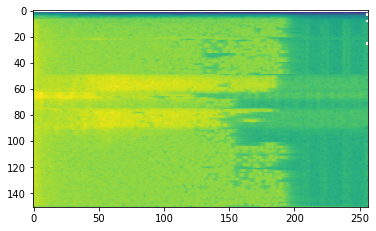

In [ ]:
spectrogram_test = np.load('/content/gdrive/MyDrive/Inzynierka/Data/output_spectrogram_test/common_voice_en_21878660.mp3.npy' , allow_pickle=True)
plt.figure()
plt.imshow(tf.math.log(spectrogram_test).numpy())
print(spectrogram_test.shape)

In [ ]:
spectrogram_test, audio_tensor_test = mp3_to_tensors(filename) 